## Supervised learning potpourri

## Airline Arrivals

Credit Card Data: http://stat-computing.org/dataexpo/2009/the-data.html

Use this dataset of airline arrival information to predict how late flights will be. A flight only counts as late if it is more than 30 minutes late.

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression

from sklearn import linear_model
from sklearn import preprocessing

from IPython.display import Image
from IPython.display import display
import seaborn as sns

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('2008.csv') ## Ridge Regression 

## DATA CLEANING

In [3]:
display(df.head())

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


In [4]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [5]:
df.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

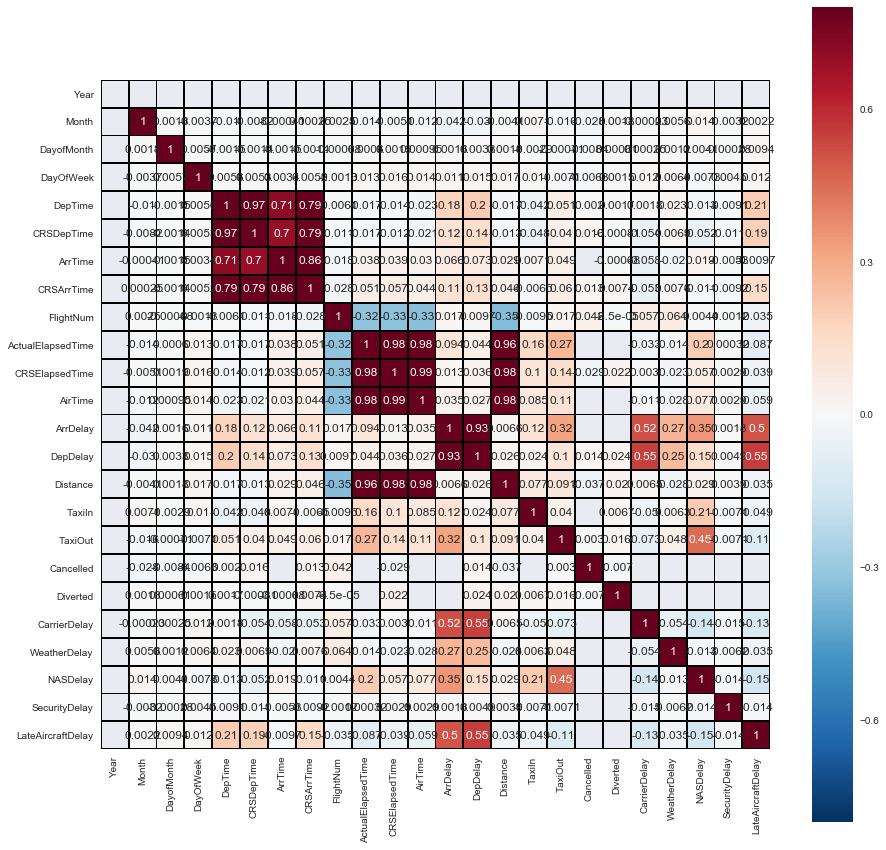

In [6]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(),vmax=.8, square=True, linecolor='black', linewidths=1, annot=True)
plt.show()

When looking at this correlation matrix,  
It is obvious that __'DepTime', 'CRSDepTime', 'CRSArrTime',__ all have a very high correlatio with __ArrTime__ thus we will not consider them when doing our model. 

It is obvious that __ArrDelay__ has a high correlation with __DepDelay__   

This means we might want to remove __DepDelay__

Thus __'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay','DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',__ will be the features I will use for my model.

and __'CarrierDelay','WeatherDelay', 'NASDelay', 'SecurityDelay',__ will not be used because we only care about being 30 min late.   


In [7]:
## Remove NAN and INF

#df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]
#df = df.apply(lambda x: x.replace([np.inf, -np.inf], x.median()))

#df = df[df.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)]


# remove NAs# 
#df = df.dropna()

In [8]:
display(df.head())

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


In [9]:
# convert columns to numeric.
df.loc[:,'ArrTime'] = pd.to_numeric(df.loc[:,'ArrTime'])
df.loc[:,'DepTime'] = pd.to_numeric(df.loc[:,'DepTime'])
df.loc[:,'CRSDepTime'] = pd.to_numeric(df.loc[:,'CRSDepTime'])
df.loc[:,'CRSArrTime'] = pd.to_numeric(df.loc[:,'CRSArrTime'])
df.loc[:,'ActualElapsedTime'] = pd.to_numeric(df.loc[:,'ActualElapsedTime'])
df.loc[:,'CRSElapsedTime'] = pd.to_numeric(df.loc[:,'CRSElapsedTime'])
df.loc[:,'AirTime'] = pd.to_numeric(df.loc[:,'AirTime'])
df.loc[:,'ArrDelay'] = pd.to_numeric(df.loc[:,'ArrDelay'])

df.loc[:,'DepDelay'] = pd.to_numeric(df.loc[:,'DepDelay'])
#df.loc[:,'Origin'] = pd.to_numeric(df.loc[:,'Origin']) ===> Object
#df.loc[:,'Dest'] = pd.to_numeric(df.loc[:,'Dest'])     ===> Object
df.loc[:,'Distance'] = pd.to_numeric(df.loc[:,'Distance'])
df.loc[:,'TaxiIn'] = pd.to_numeric(df.loc[:,'TaxiIn'])
df.loc[:,'TaxiOut'] = pd.to_numeric(df.loc[:,'TaxiOut'])
df.loc[:,'WeatherDelay'] = pd.to_numeric(df.loc[:,'WeatherDelay'])
df.loc[:,'NASDelay'] = pd.to_numeric(df.loc[:,'NASDelay'])
df.loc[:,'SecurityDelay'] = pd.to_numeric(df.loc[:,'SecurityDelay'])
df.loc[:,'CarrierDelay'] = pd.to_numeric(df.loc[:,'CarrierDelay'])



In [10]:
df_f = df[['FlightNum','ArrTime',
           'ActualElapsedTime','CRSElapsedTime', 'AirTime', 'ArrDelay',
        'Distance', 'TaxiIn', 'TaxiOut']]

In [11]:
display(df_f.head())

,FlightNum,ArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,Distance,TaxiIn,TaxiOut
0,335,2211.0,128.0,150.0,116.0,-14.0,810,4.0,8.0
1,3231,1002.0,128.0,145.0,113.0,2.0,810,5.0,10.0
2,448,804.0,96.0,90.0,76.0,14.0,515,3.0,17.0
3,1746,1054.0,88.0,90.0,78.0,-6.0,515,3.0,7.0
4,3920,1959.0,90.0,90.0,77.0,34.0,515,3.0,10.0


In [12]:
df_f.dtypes

FlightNum              int64
ArrTime              float64
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
Distance               int64
TaxiIn               float64
TaxiOut              float64
dtype: object

In [13]:
df_f['ArrDelay'].describe()

count    6.855029e+06
mean     8.168452e+00
std      3.850194e+01
min     -5.190000e+02
25%     -1.000000e+01
50%     -2.000000e+00
75%      1.200000e+01
max      2.461000e+03
Name: ArrDelay, dtype: float64

In [14]:
## Make a binary outcomes

#df_f['Arr_30minLate'] = 0
#df_f['Arr_30minEarly'] = np.where(df_f['ArrDelay']<=-30, 1, 0)
#df_f['Arr_15minEarly'] = np.where(df_f['ArrDelay']<=-15 & df_f['ArrDelay']>0, 1, 0)
df_f['Arr_Ontime'] = np.where(df_f['ArrDelay']<=30, 1, 0)
df_f['Arr_Late'] = np.where(df_f['ArrDelay']>30, 1, 0)
#df_f['Arr_30minLate']= np.where((df_f['ArrDelay']>0. & df_f['ArrDelay']<=30.), 1, 0)
#df_f.loc[(df_f['ArrDelay']>0 & df_f['ArrDelay']<=30), df_f['Arr_30minLate']]=1
#df_f['Arr_60minLate'] = np.where(df_f['ArrDelay']>60, 1, 0)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [15]:
df_f = df_f.dropna()
display(df_f.head())

,FlightNum,ArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,Distance,TaxiIn,TaxiOut,Arr_Ontime,Arr_Late
0,335,2211.0,128.0,150.0,116.0,-14.0,810,4.0,8.0,1,0
1,3231,1002.0,128.0,145.0,113.0,2.0,810,5.0,10.0,1,0
2,448,804.0,96.0,90.0,76.0,14.0,515,3.0,17.0,1,0
3,1746,1054.0,88.0,90.0,78.0,-6.0,515,3.0,7.0,1,0
4,3920,1959.0,90.0,90.0,77.0,34.0,515,3.0,10.0,0,1


## RIDGE  REGRESSION

In [16]:
Y = df_f['Arr_Late']
X = df_f.loc[:, ~(df_f.columns).isin(['Arr_Ontime','Arr_Late','ArrDelay'])]

In [17]:
ridgeregr = LogisticRegression(penalty='l2')
ridgeregr.fit(X, Y)
print('R² for the model with few features:')
print(ridgeregr.score(X, Y))

R² for the model with few features:
0.885923166773


In [20]:
target = Y
data = X
y_pred = ridgeregr.predict(data)
score = ridgeregr.score(data, target) 
cross_val = cross_val_score(ridgeregr, data, target, cv=5)

In [26]:
print("Number of mislabeled points out of a total {} points : {}".format(data.shape[0], (target != y_pred).sum()))

cm = confusion_matrix(target, y_pred)

df_cm = pd.DataFrame(cm, index=['Actual False', 'Actual True'], columns=['Predict False', 'Predict True']) 

display(df_cm)

t_pos = df_cm.iloc[1,1]
t_neg = df_cm.iloc[0,0] 
f_pos = df_cm.iloc[0,1] 
f_neg = df_cm.iloc[1,0]

a_pos = (target == True).sum() 
a_neg = (target == False).sum() 
p_pos = (y_pred == True).sum() 
p_neg = (y_pred == False).sum() 
tot = data.shape[0]

print("False Positives (Type I error): {} ({:.1%})\nFalse Negatives (Type II error): {} ({:.1%})".format(f_pos,f_pos / a_neg,f_neg,f_neg / a_pos))

plusminus = u"\u00B1"
print('\nScore on training set: {:.3%}'.format(score)) 
print('\nCross validation results: {:.3%} {} {:.3%} \n \n {}'.format(cross_val.mean(), plusminus, cross_val.std(), cross_val))

#print('\nElapsed Time: {:.2f} seconds'.format(time() - start_time))

Number of mislabeled points out of a total 6855029 points : 785947


,Predict False,Predict True
Actual False,5926989,26642
Actual True,759305,142093


False Positives (Type I error): 26642 (0.4%)
False Negatives (Type II error): 759305 (84.2%)

Score on training set: 88.535%

Cross validation results: 88.530% ± 0.113% 
 
 [ 0.88448491  0.88357892  0.88666862  0.88623455  0.88551902]


## VANILLA LOGISTIC REGRESSION

In [27]:
logregr = LogisticRegression(C=1e9)
logregr.fit(X, Y)
print('R² for the model with few features:')
print(logregr.score(X, Y))

R² for the model with few features:
0.885551177099


In [28]:
y_pred = logregr.predict(data)
score = logregr.score(data, target) 
cross_val = cross_val_score(logregr, data, target, cv=5)

In [29]:
print("Number of mislabeled points out of a total {} points : {}".format(data.shape[0], (target != y_pred).sum()))

cm = confusion_matrix(target, y_pred)

df_cm = pd.DataFrame(cm, index=['Actual False', 'Actual True'], columns=['Predict False', 'Predict True']) 

display(df_cm)

t_pos = df_cm.iloc[1,1]
t_neg = df_cm.iloc[0,0] 
f_pos = df_cm.iloc[0,1] 
f_neg = df_cm.iloc[1,0]

a_pos = (target == True).sum() 
a_neg = (target == False).sum() 
p_pos = (y_pred == True).sum() 
p_neg = (y_pred == False).sum() 
tot = data.shape[0]

print("False Positives (Type I error): {} ({:.1%})\nFalse Negatives (Type II error): {} ({:.1%})".format(f_pos,f_pos / a_neg,f_neg,f_neg / a_pos))

plusminus = u"\u00B1"
print('\nScore on training set: {:.3%}'.format(score)) 
print('\nCross validation results: {:.3%} {} {:.3%} \n \n {}'.format(cross_val.mean(), plusminus, cross_val.std(), cross_val))

#print('\nElapsed Time: {:.2f} seconds'.format(time() - start_time))

Number of mislabeled points out of a total 6855029 points : 784550


,Predict False,Predict True
Actual False,5928116,25515
Actual True,759035,142363


False Positives (Type I error): 25515 (0.4%)
False Negatives (Type II error): 759035 (84.2%)

Score on training set: 88.555%

Cross validation results: 88.552% ± 0.120% 
 
 [ 0.88459796  0.88379993  0.88710772  0.88641763  0.88568386]


## LASSO REGRESSION

In [23]:
lass = LogisticRegression(penalty='l1')
lass.fit(X, Y)
print('R² for the model with few features:')
print(lass.score(X, Y))

R² for the model with few features:
0.88534738511


In [24]:
y_pred = lass.predict(data)
score = lass.score(data, target) 
cross_val = cross_val_score(lass, data, target, cv=5)

In [25]:
print("Number of mislabeled points out of a total {} points : {}".format(data.shape[0], (target != y_pred).sum()))

cm = confusion_matrix(target, y_pred)

df_cm = pd.DataFrame(cm, index=['Actual False', 'Actual True'], columns=['Predict False', 'Predict True']) 

display(df_cm)

t_pos = df_cm.iloc[1,1]
t_neg = df_cm.iloc[0,0] 
f_pos = df_cm.iloc[0,1] 
f_neg = df_cm.iloc[1,0]

a_pos = (target == True).sum() 
a_neg = (target == False).sum() 
p_pos = (y_pred == True).sum() 
p_neg = (y_pred == False).sum() 
tot = data.shape[0]

print("False Positives (Type I error): {} ({:.1%})\nFalse Negatives (Type II error): {} ({:.1%})".format(f_pos,f_pos / a_neg,f_neg,f_neg / a_pos))

plusminus = u"\u00B1"
print('\nScore on training set: {:.3%}'.format(score)) 
print('\nCross validation results: {:.3%} {} {:.3%} \n \n {}'.format(cross_val.mean(), plusminus, cross_val.std(), cross_val))

#print('\nElapsed Time: {:.2f} seconds'.format(time() - start_time))

Number of mislabeled points out of a total 6855029 points : 785947


,Predict False,Predict True
Actual False,5926989,26642
Actual True,759305,142093


False Positives (Type I error): 26642 (0.4%)
False Negatives (Type II error): 759305 (84.2%)

Score on training set: 88.535%

Cross validation results: 88.530% ± 0.113% 
 
 [ 0.88448491  0.88357892  0.88666862  0.88623455  0.88551902]


It looks like Ridge, Lasso and Vanilla Logistic Regression all gave us about the same results.   
